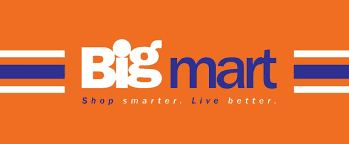

# BIGMART SALES PREDICTION ANALYSIS
By Saranya

## Problem Statement
###  The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.
## Objective
### The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
## Generating Hypothesis


### Item Fat Content:
##### H0: The fat content of the product does not have any significant impact on the sales.
##### H1: People prefer low fat product, so product containing low fat will have higher sales

### Item Type:
#### H0: There is no significant relationship between item type and sales
#### H1: Specific type of item have significantly higher sales.

### Item MRP:
#### H0: There is no significant relationship between Item MRP and sales.
#### H1: An optimal Item MRP within a specific price range positively affects sales.

## Installing Packages

In [1]:
!pip install pandas
!pip install numpy 
!pip install seaborn
!pip install matplotlib
!pip install dtale
!pip install pandas-profiling
!pip install ipywidgets
!pip install klib
!pip install scikit-learn
!pip install xgboost

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from pandas_profiling import ProfileReport
import klib
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

C:\Users\saran\AppData\Local\Temp\ipykernel_13664\3571284652.py:7: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



## Collecting And Processing Data

In [3]:
train=pd.read_csv("S:/technocolabsminiproject/Train.csv")
test=pd.read_csv("S:/technocolabsminiproject/Test.csv")

In [4]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
train.shape  # a tuple of array dimensions that tells the number of rows and columns of a given DataFrame

(8523, 12)

## Identifing Missing Term

In [6]:
train.isnull().sum()  #seeing the number of null values in the dataset

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [8]:
test.shape

(5681, 11)

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train.info()  #seeing the detailed info of the dataset and its types of target variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train.describe()  # to generate descriptive statistics that summarize the central tendency, dispersion and
                  # shape of a dataset's distribution, excluding NaN values.

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [13]:
test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

### Item_Weight is numerical column so we fill it with Mean Imputation

In [14]:
train['Item_Weight'].describe() #seeing all the central tendenies of the dataset

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)  #replacing null values with mean values
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [16]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [18]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
train['Outlet_Size'].mode()
test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

<Axes: >

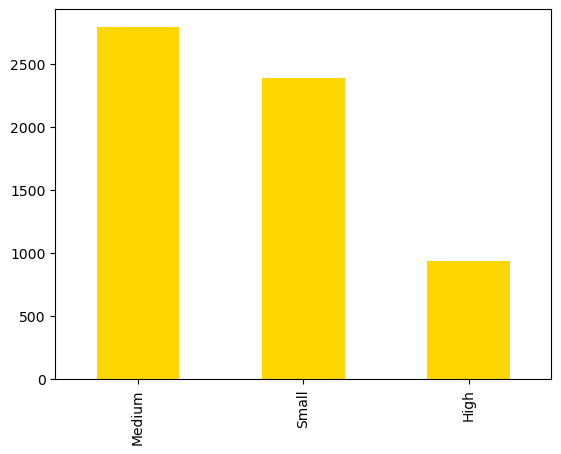

In [20]:
train["Outlet_Size"].value_counts().plot(kind="bar",color="gold")

<Axes: >

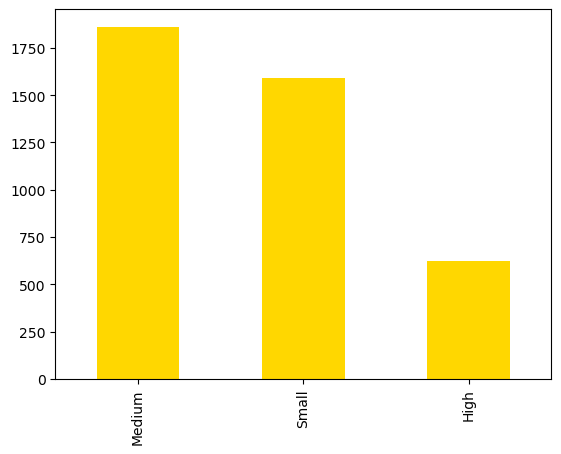

In [21]:
test["Outlet_Size"].value_counts().plot(kind="bar",color="gold")

In [22]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [23]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

#### pandas treats the mode as something special since they can be unimodal , bimodal or multimodal distributions they had to make sure that 1 value could be returned "Always return series even if only one value is returned"

In [24]:
train['Outlet_Size'].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

In [25]:
test['Outlet_Size'].describe()

count       5681
unique         3
top       Medium
freq        3468
Name: Outlet_Size, dtype: object

In [26]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## Data Exploration And Visualization

In [30]:
num = train.select_dtypes('number').columns.to_list()
cat = train.select_dtypes('object').columns.to_list()
BM_num=train[num]
BM_cat = train[cat]

[train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

<Axes: >

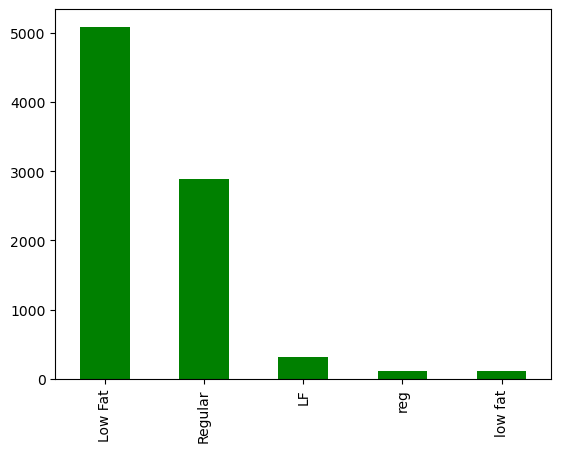

In [31]:
train['Item_Fat_Content'].value_counts().plot(kind='bar',color='green')

#### There are 5 category in Item_Fact_Content column but same category expressed in different way so we need to combine all with respectie category

In [32]:
train =train.replace(to_replace="low fat", value="Low Fat")
train =train.replace(to_replace="LF", value="Low Fat")
train =train.replace(to_replace="reg", value="Regular")

In [33]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<Axes: >

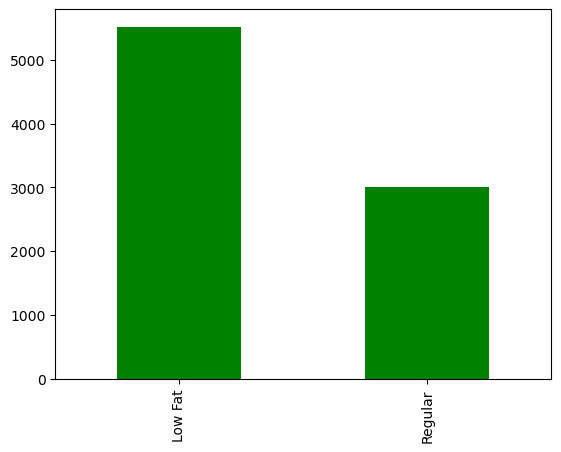

In [34]:
train['Item_Fat_Content'].value_counts().plot(kind='bar',color='green')

#### Finding Outlet Age 

In [35]:
train['Outlet_Age'],test['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year),test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

In [36]:
train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0     Supermarket Type1          3735.1380          21  
1     Supermarket Type2           443.4228          11  
2     Supermarket Type1          2097.2700          21  
3         Grocery Store           732.3800          22  
4     Supermarket Type1           994.7052          33  
...                 ...                ...         ...  
8518  Supermarket Type1          2778.3834          33  
8519  Supermarket Type1           549.2850          18  
8520  Supermarket Type1          1193.1136          16  
8521  Supermarket Type2          1845.5976          11  
8522  Supermarket Type1           765.6700          23  

[8523 rows x 13 columns]

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

## Univariate Analysis

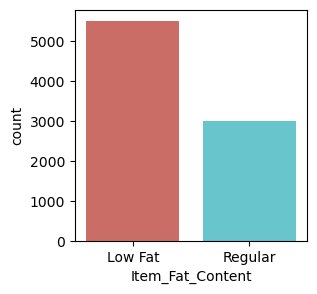

In [38]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train,palette='hls')
plt.xlabel('Item_Fat_Content',fontsize=10)
plt.show()

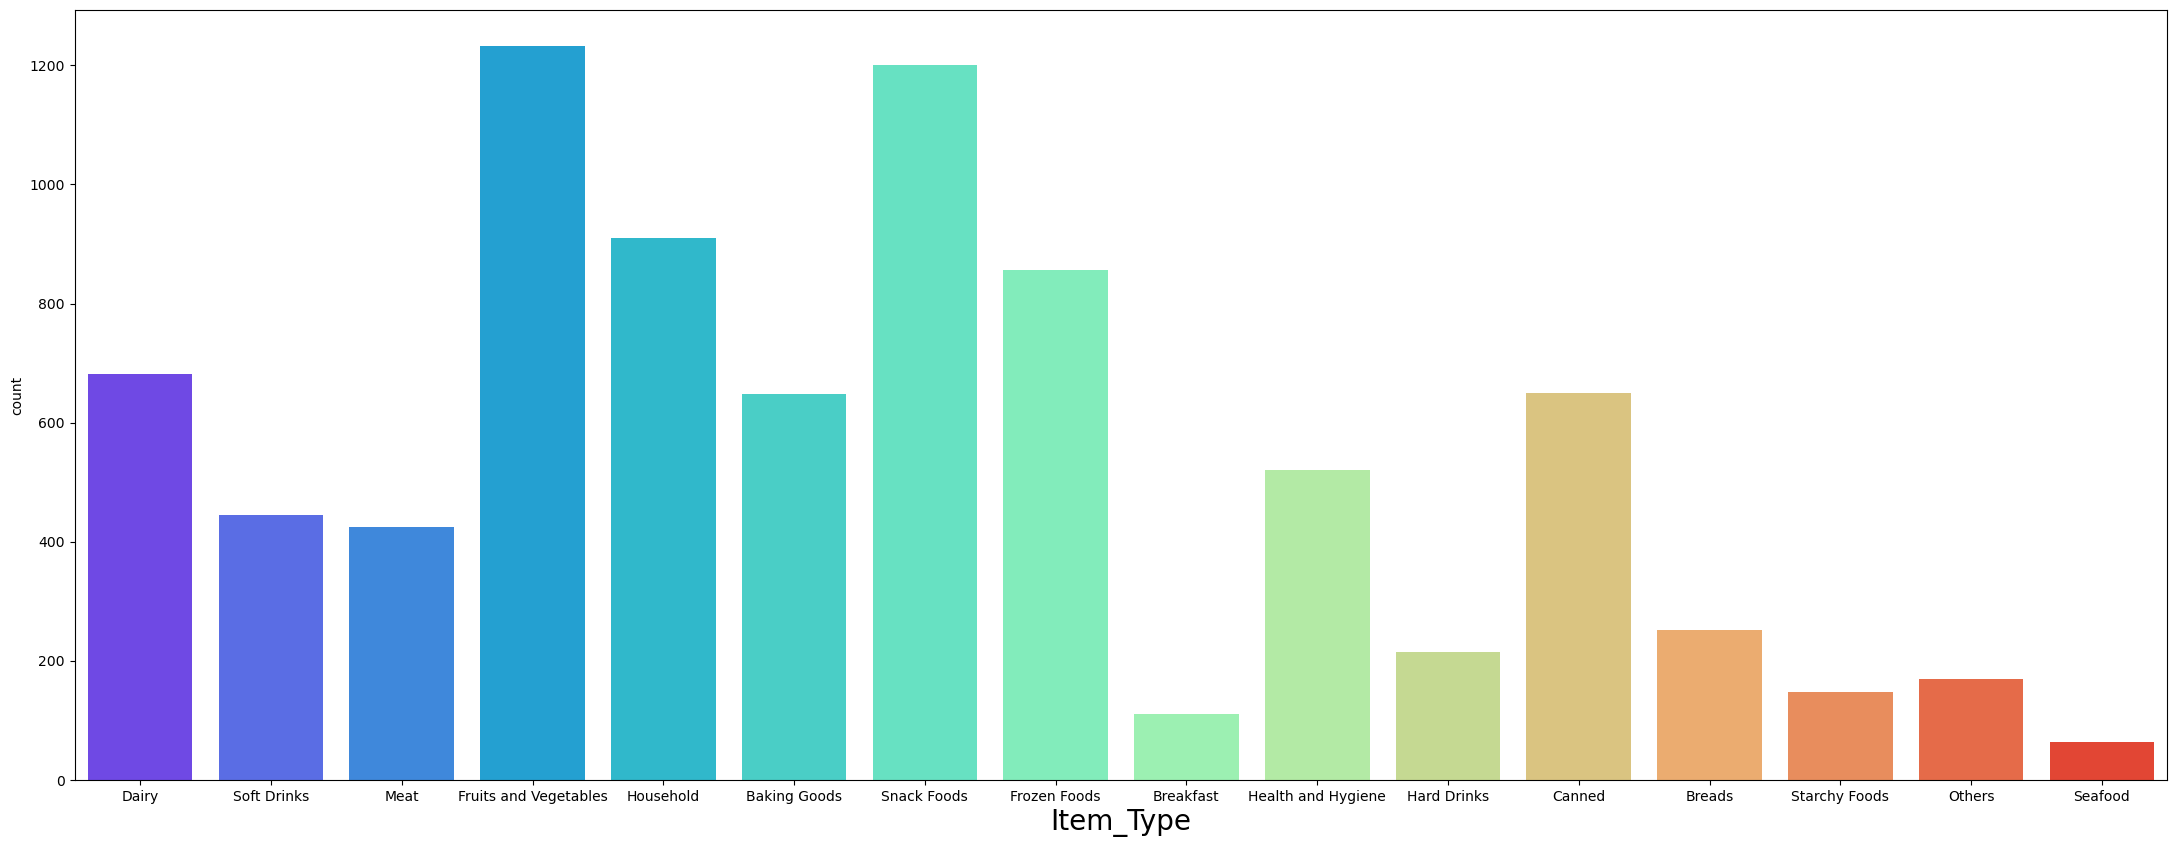

In [39]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type',data=train,palette='rainbow')
plt.xlabel('Item_Type',fontsize=20)
plt.show()

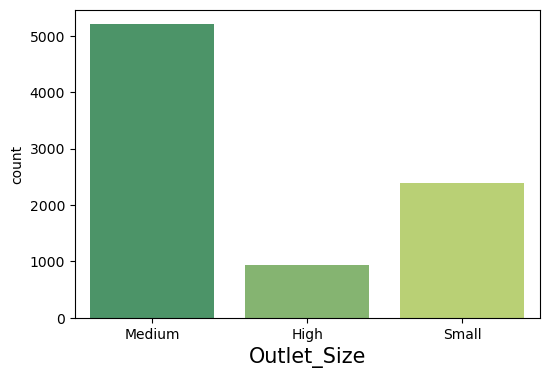

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Size',data=train,palette='summer')
plt.xlabel('Outlet_Size',fontsize=15)
plt.show()

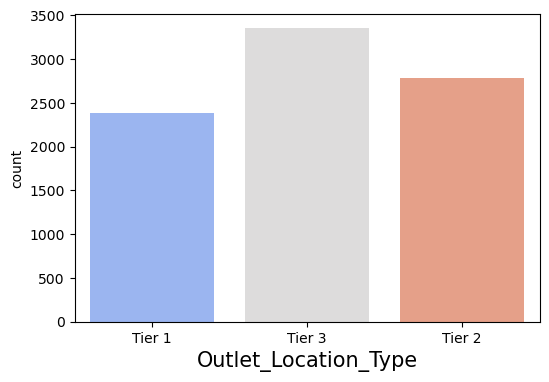

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Location_Type',data=train,palette='coolwarm')
plt.xlabel('Outlet_Location_Type',fontsize=15)
plt.show()

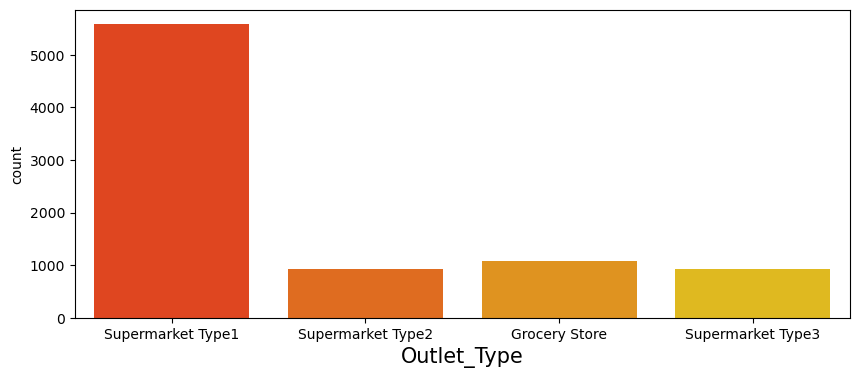

In [42]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type',data=train,palette='autumn')
plt.xlabel('Outlet_Type',fontsize=15)
plt.show()

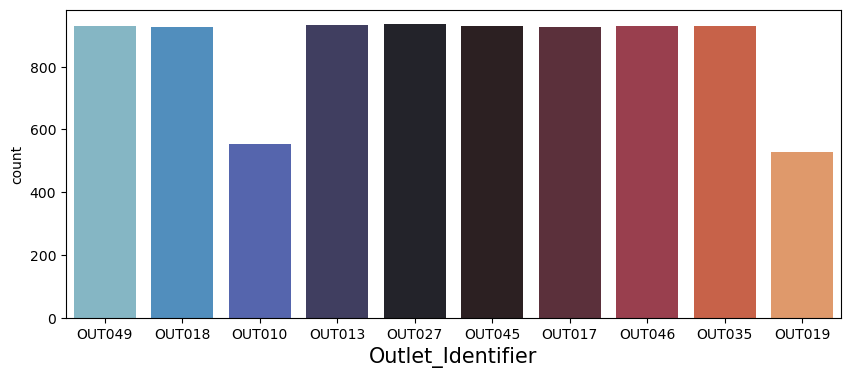

In [43]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Identifier',data=train,palette='icefire')
plt.xlabel('Outlet_Identifier',fontsize=15)
plt.show()

C:\Users\saran\AppData\Local\Temp\ipykernel_13664\3816821068.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




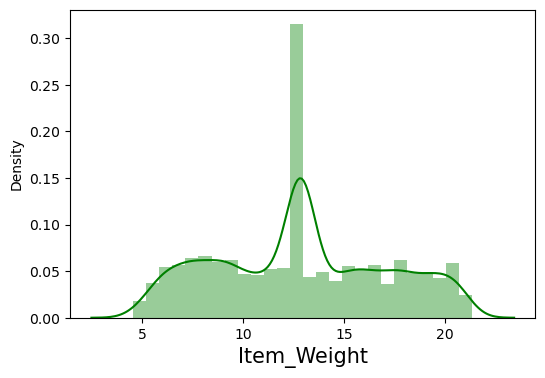

In [44]:
plt.figure(figsize=(6, 4))
sns.distplot(train['Item_Weight'],color='green')
plt.xlabel('Item_Weight', fontsize=15)
plt.show()

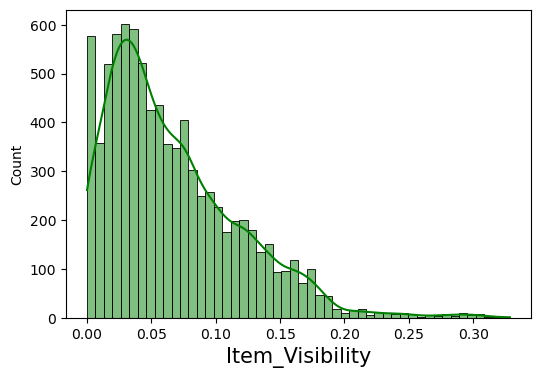

In [45]:
plt.figure(figsize=(6, 4))
sns.histplot(train['Item_Visibility'], kde=True,color = 'green')
plt.xlabel('Item_Visibility', fontsize=15)
plt.show()

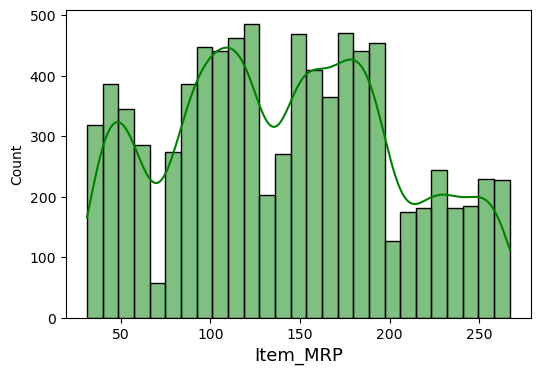

In [46]:
plt.figure(figsize=(6, 4))
sns.histplot(train['Item_MRP'], kde=True,color = 'green')
plt.xlabel('Item_MRP', fontsize=13)
plt.show()

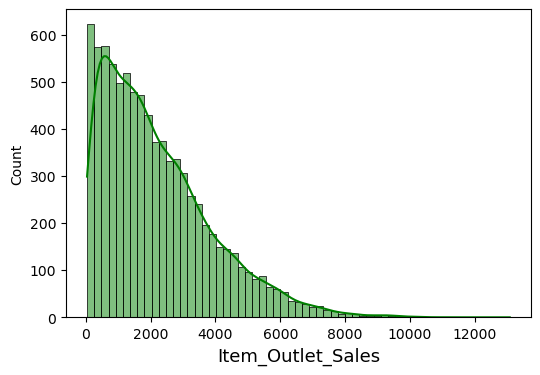

In [47]:
plt.figure(figsize=(6, 4))
sns.histplot(train['Item_Outlet_Sales'], kde=True,color = 'green')
plt.xlabel('Item_Outlet_Sales', fontsize=13)
plt.show()

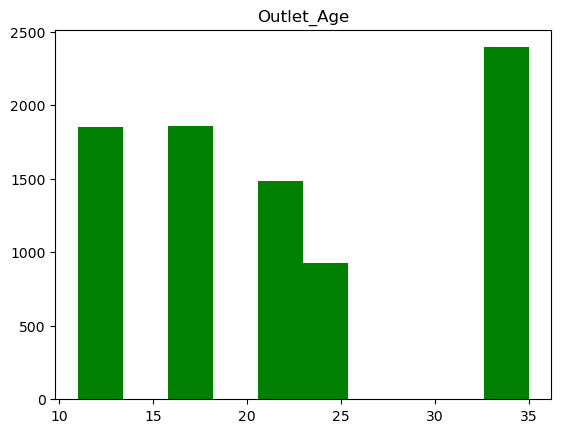

In [48]:
num =train.select_dtypes('number').columns.to_list()
BM_num =train[num]
plt.hist(train['Outlet_Age'],color='green')
plt.title("Outlet_Age")
plt.show()

#### UNIVARIATE - Realizations

Item_Weight-items with the weight of "12.5" is sold maximum.

Item_Fat_Content-Most items sold are contain 'Low fat.'

Item_Visibility-Items with high visibility have high sales.

Item_Type- 'fruits and vegetables' and 'snack foods' are comparatively popular among the others.

Item_MRP-Most items sold are between the price range of '90-200.'

Outlet_Identifier-"OUT010 and OUT019" have lower sales.

Outlet_Establishment_Year-There is noe outlets established between "1987-1997".

Outlet_Size-Most of the outlets are 'medium' sized.

Outlet_Location_Type-The most common type is Tier3.

Outlet_Type-'Supermarket Type1' has a wide margin of sales.

Outlet_Age-Outlets with the age range between '10-20' have significantly same level of sales.

## Bivariate Analysis
### Numerical
#### There are lot of unique value so scatter plot could be better

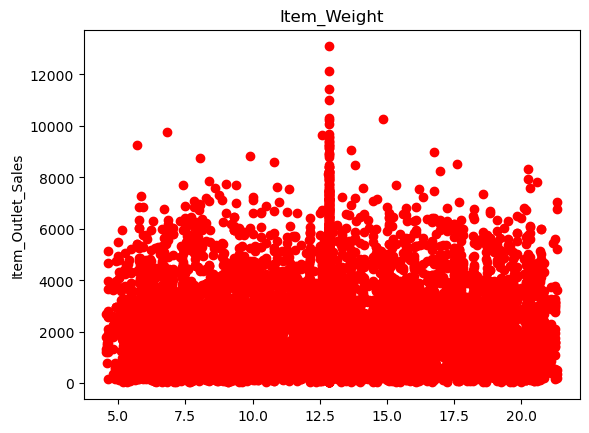

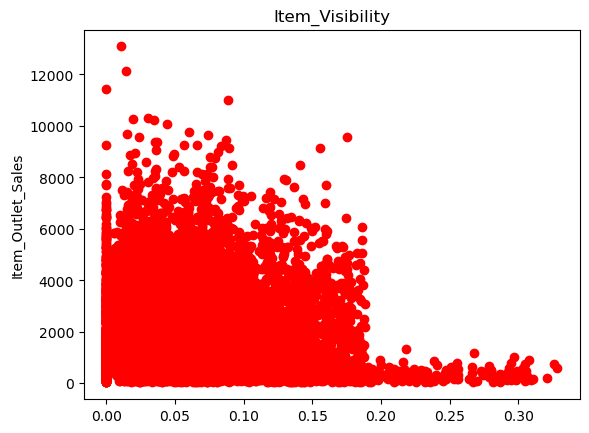

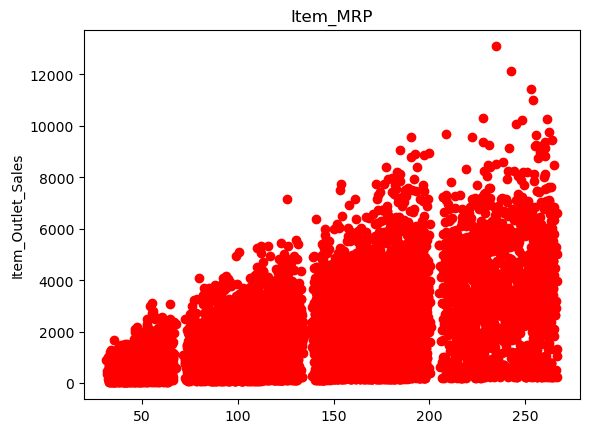

In [49]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'],color='red')
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

#### Numeric columns Realizations
Item_Weight     - The data is very spreaded, no specific pattern.

Item_MRP        - Items with higher MRP tend to sell better in most cases.

Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not                   selling well is some cases.

### Categorical Column
#### Each column analyse with Item_Outlet_Sales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


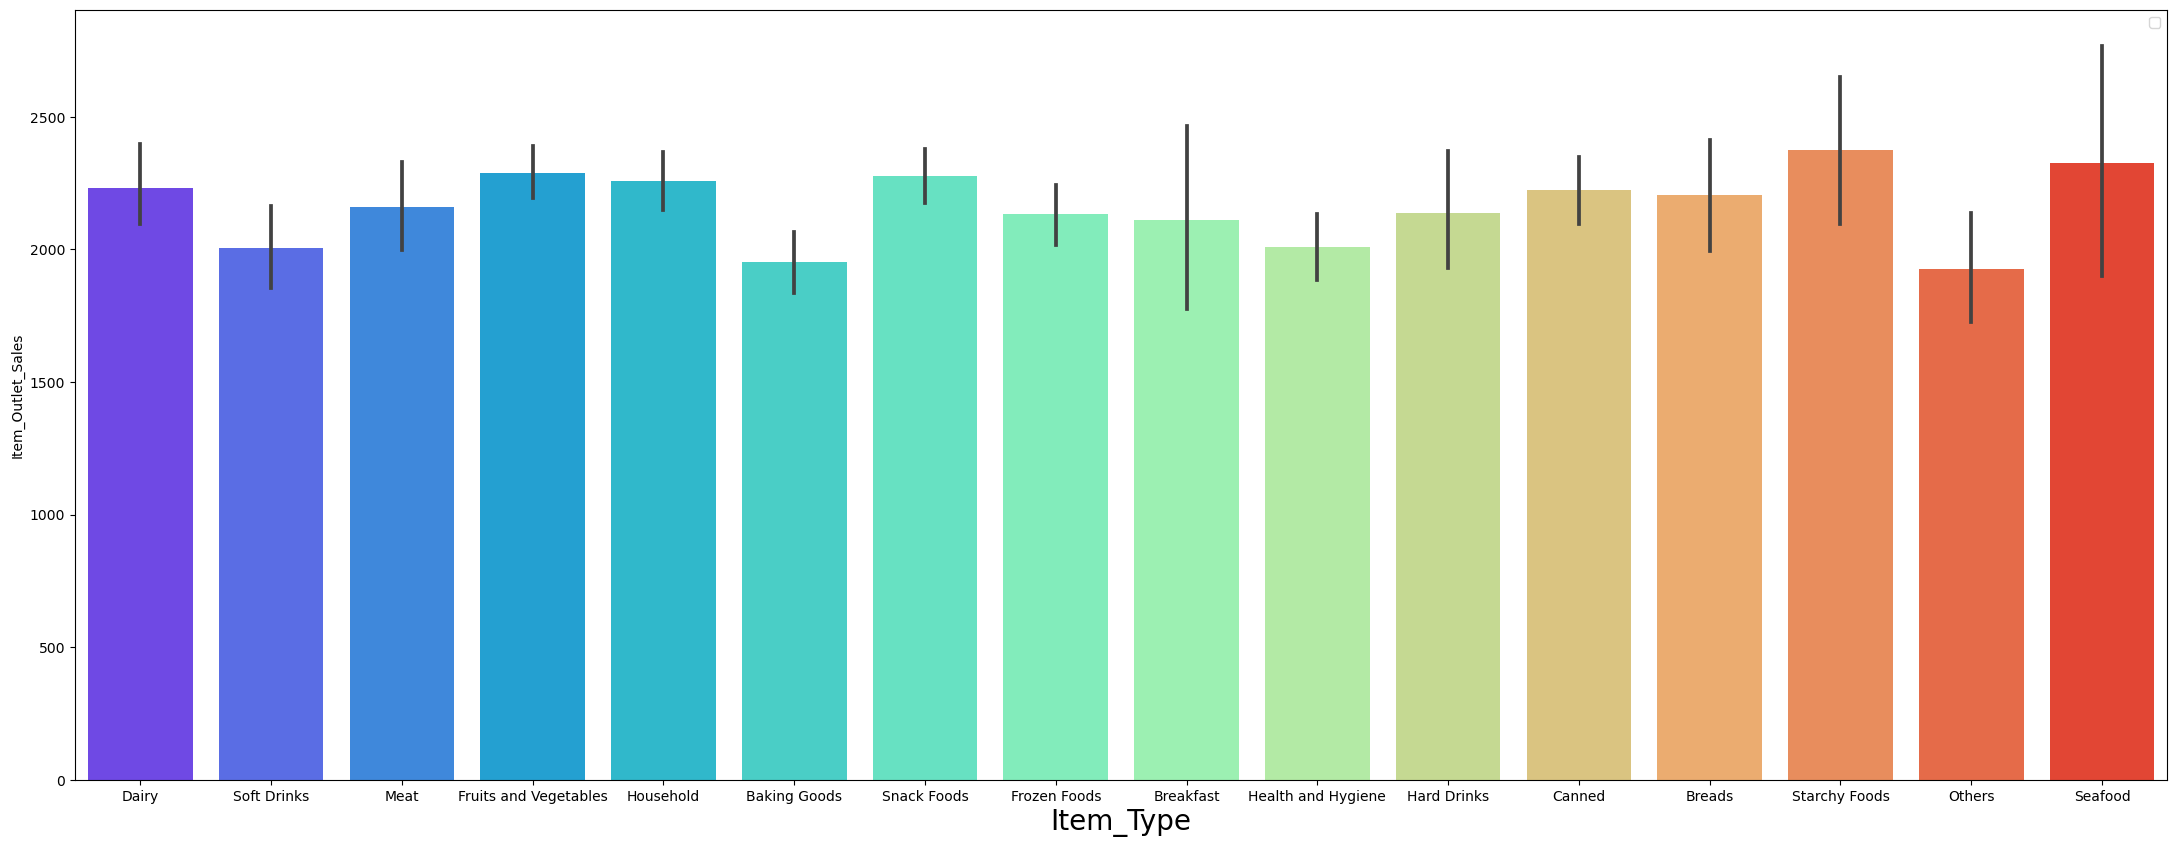

In [50]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='rainbow')
plt.xlabel('Item_Type', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


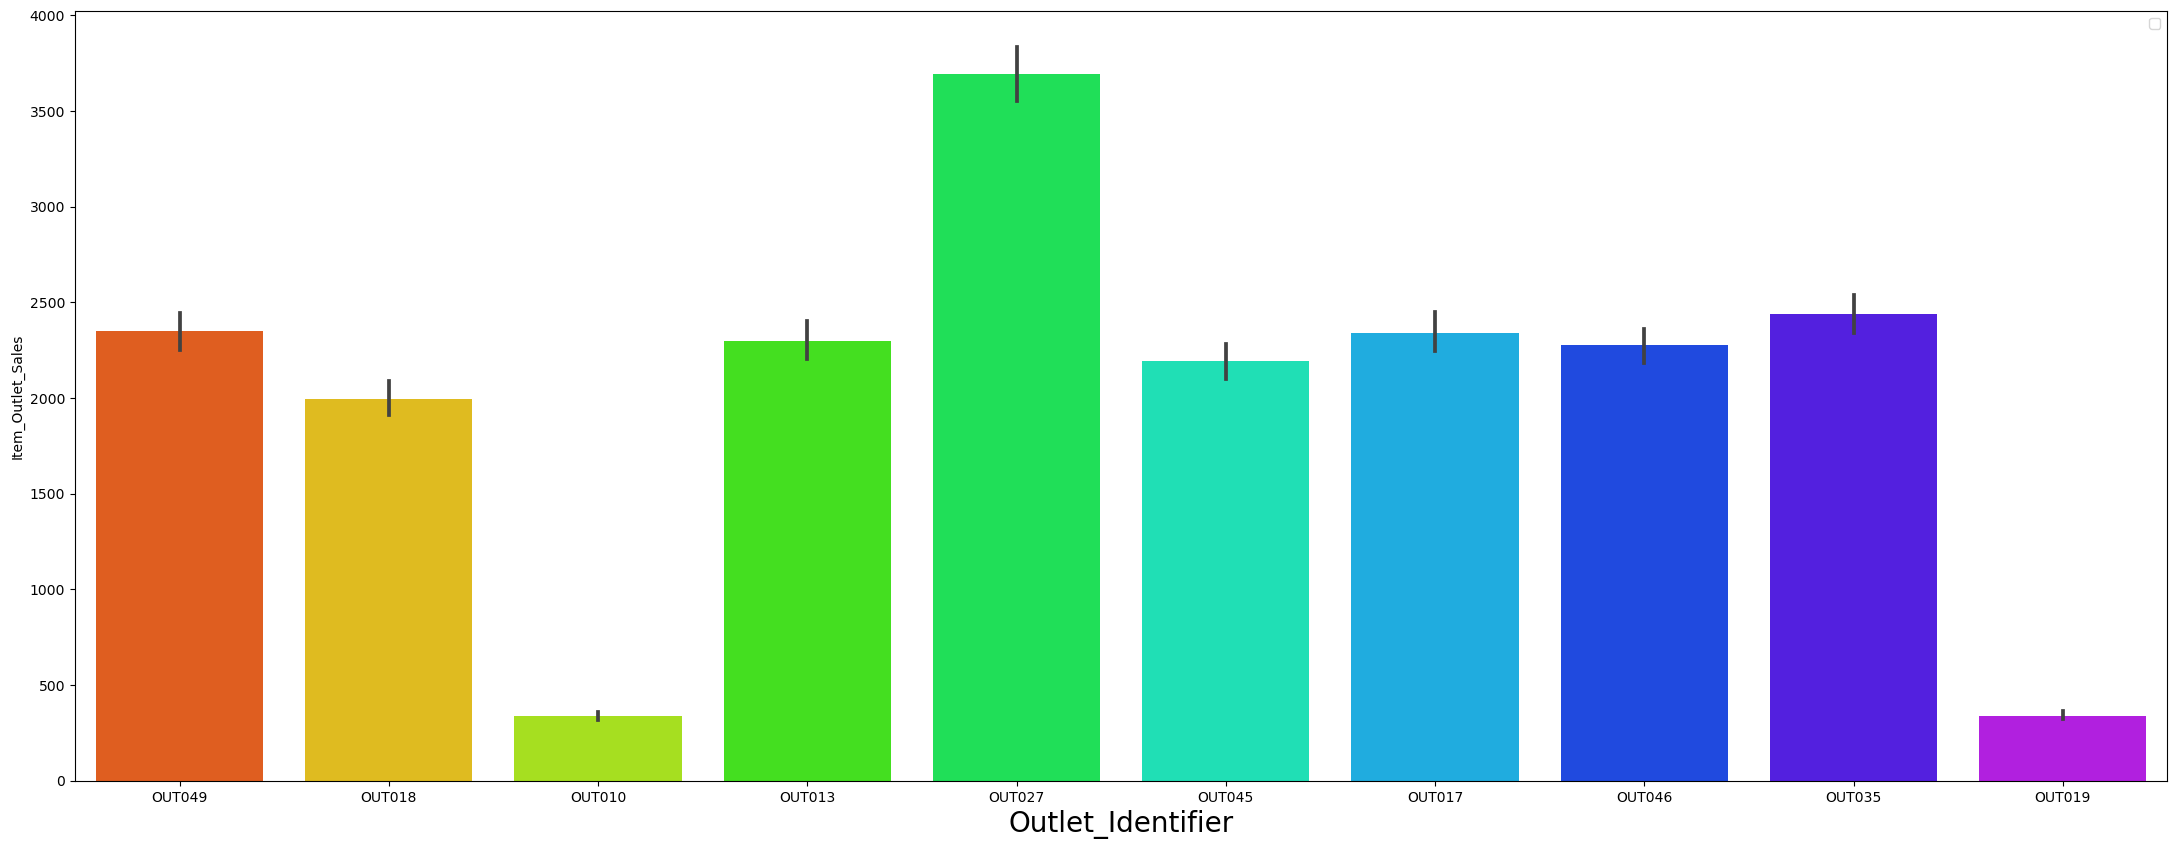

In [51]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=train,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


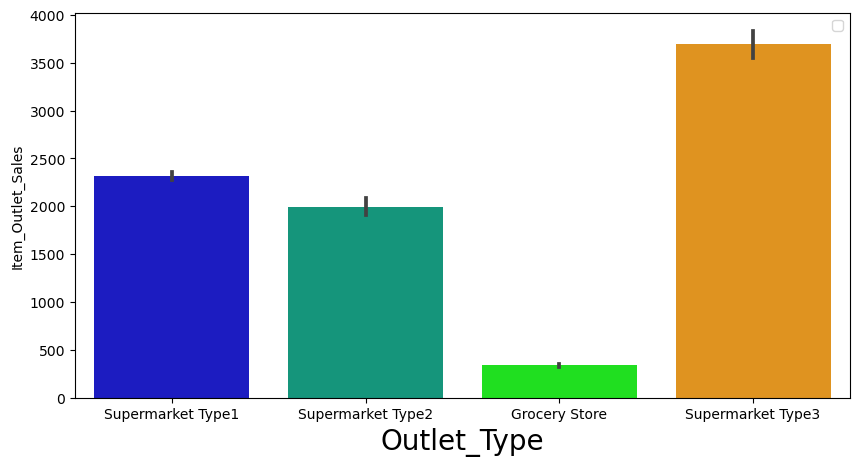

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=train,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


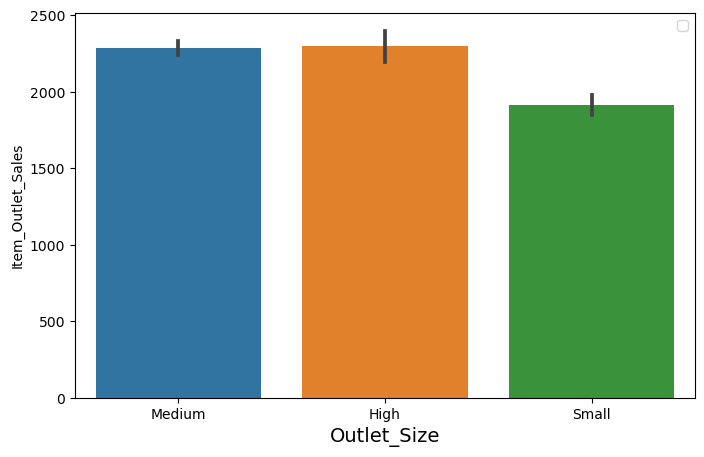

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=train)
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


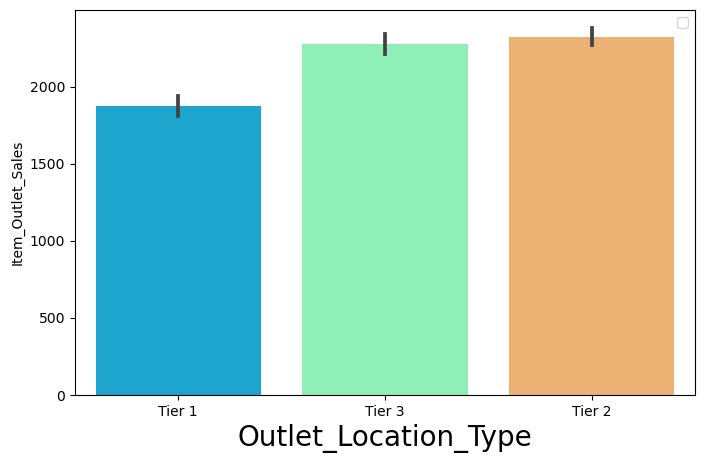

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=train,palette='rainbow')
plt.xlabel('Outlet_Location_Type', fontsize=20)
plt.legend()
plt.show()

### Realization

#  ProfileReport

In [55]:
profile = ProfileReport(train, title ="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Corraltion Matrix

C:\Users\saran\AppData\Local\Temp\ipykernel_13664\3244025565.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



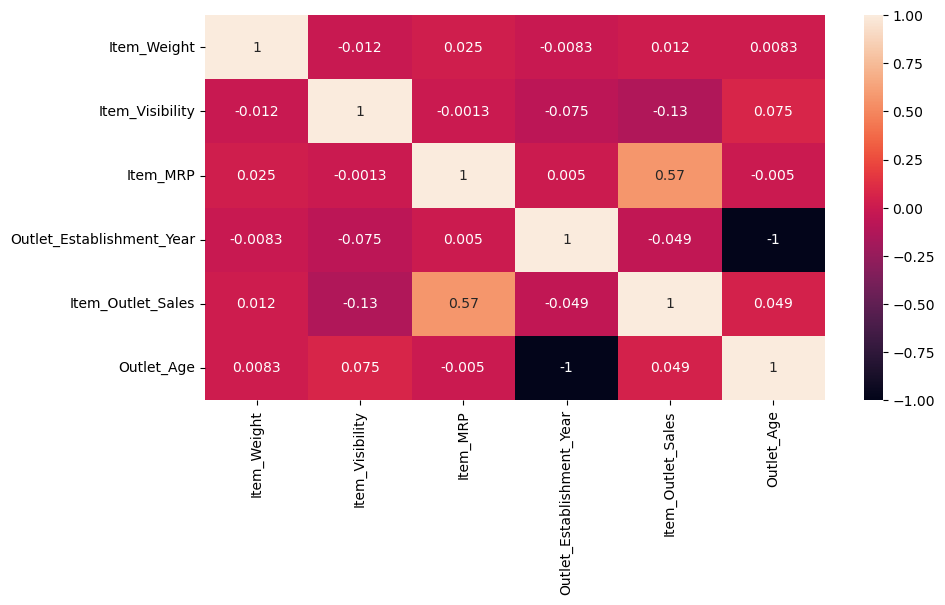

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

#### We can see Item_Outlet_Sales is highly correlated with Item_MRP

### By Analysing Klib

GridSpec(6, 7)

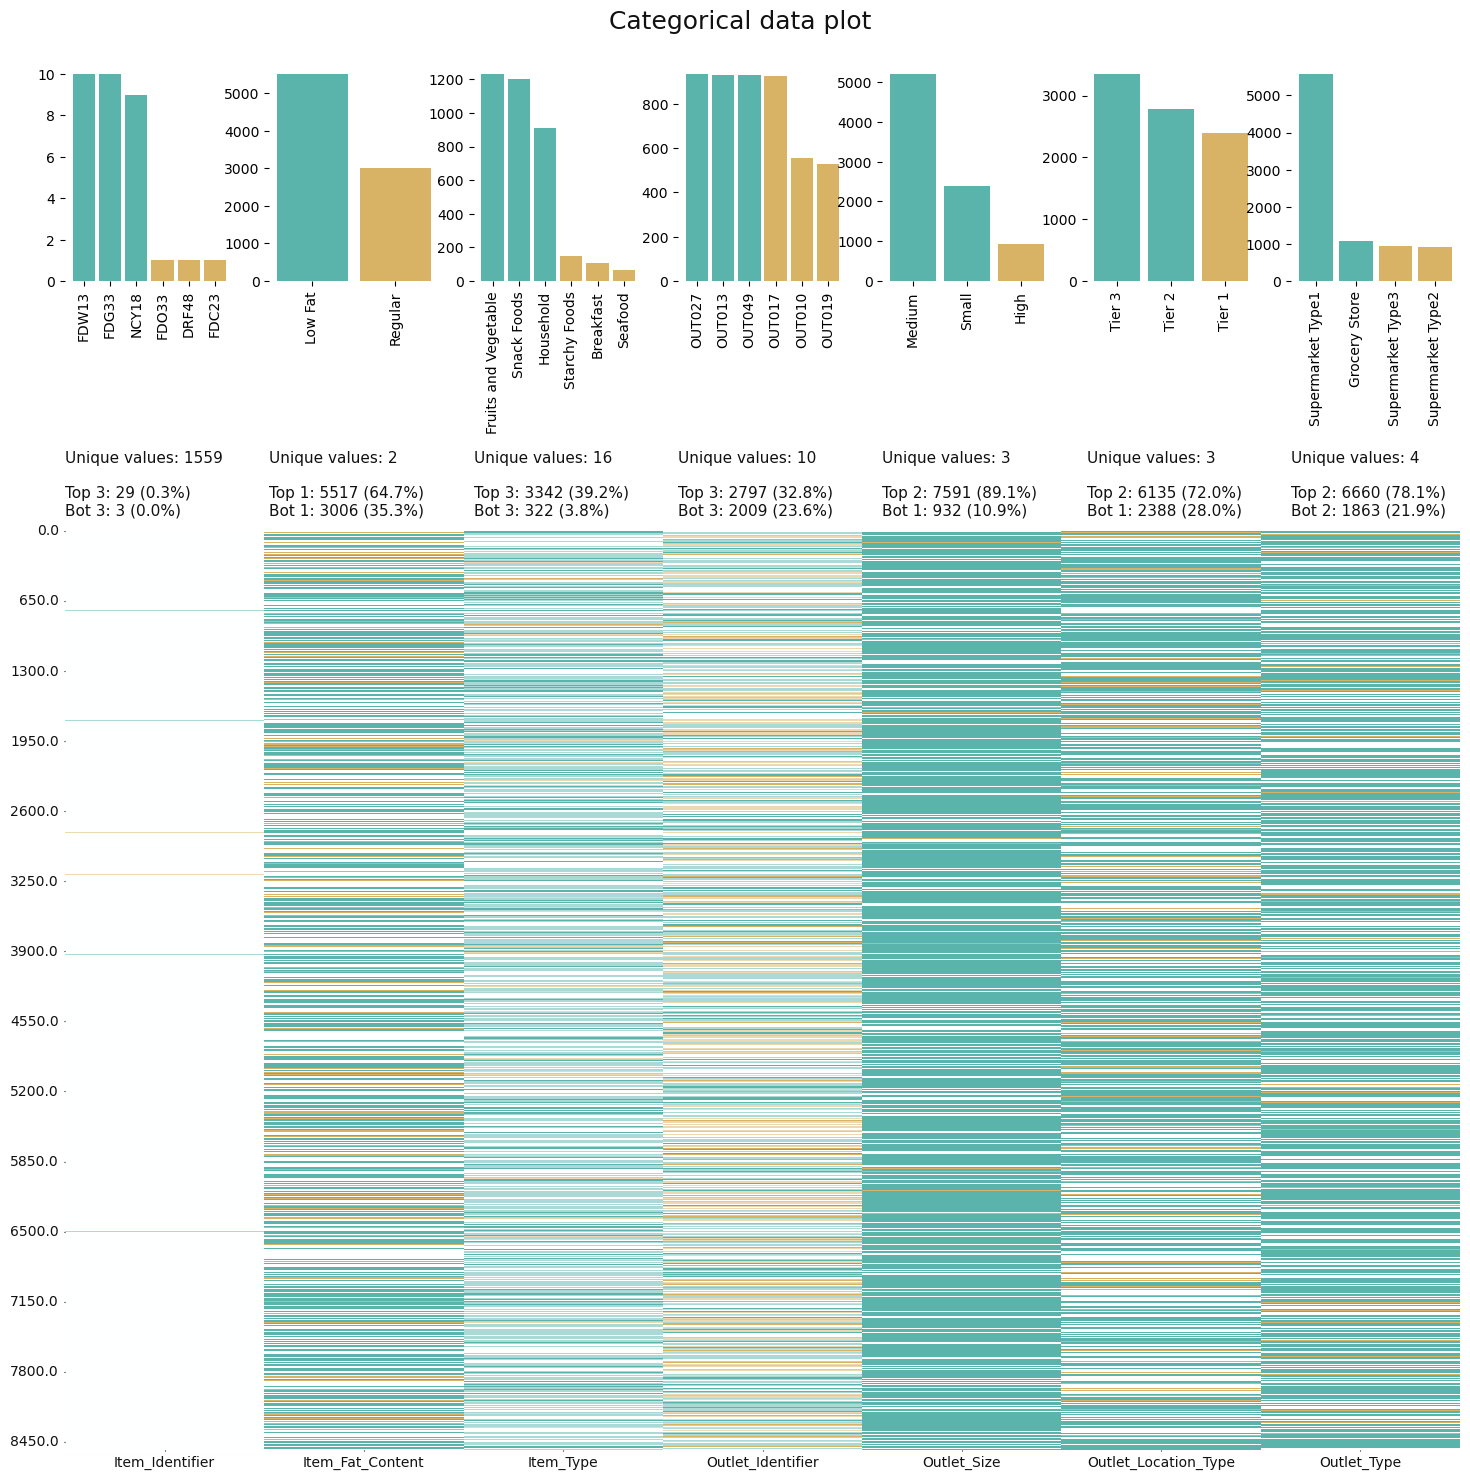

In [57]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(train) # returns a visualization of the number and frequency of categorical featuresklib.cat_plot(train)

In [58]:
klib.corr_mat(train) # returns a color-encoded correlation matrix

<Axes: title={'center': 'Feature-correlation (pearson)'}>

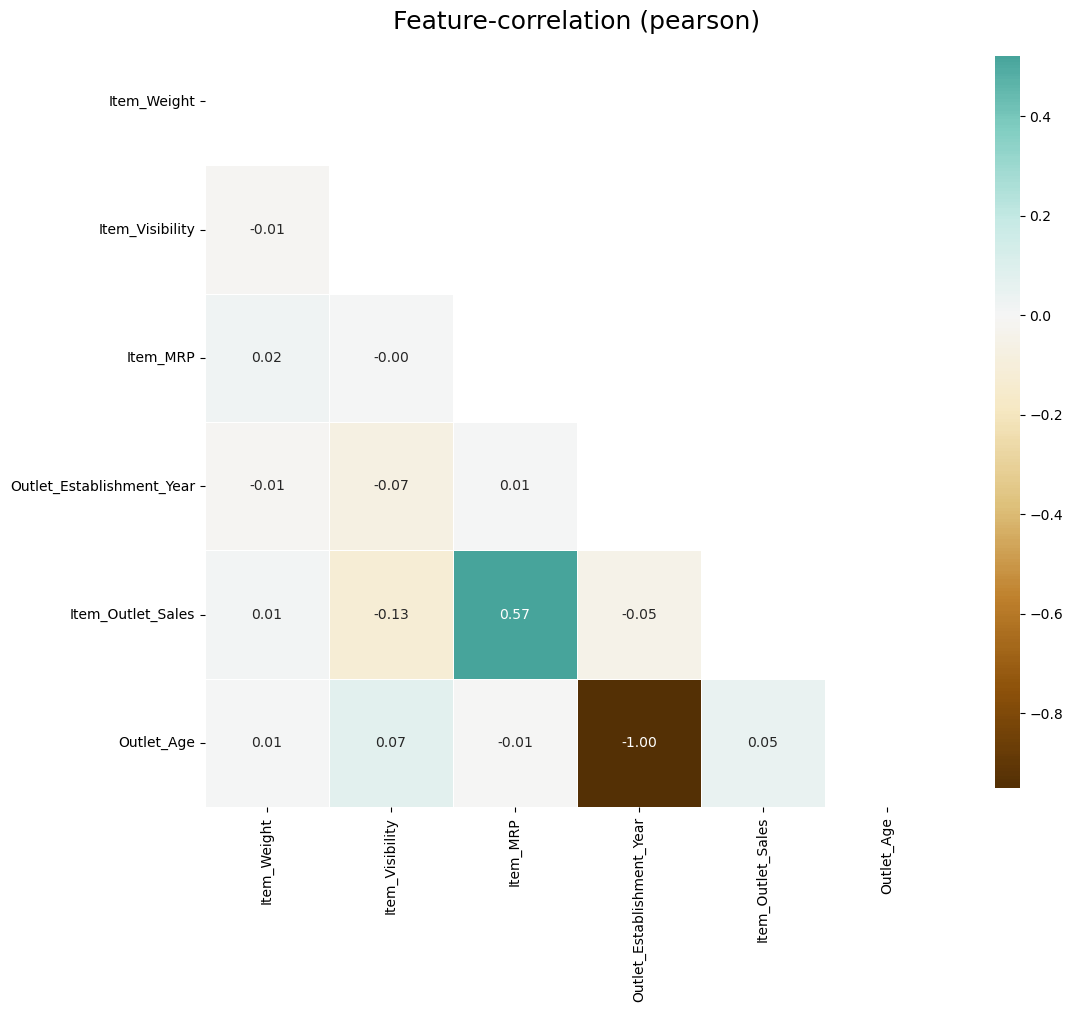

In [59]:
klib.corr_plot(train) # returns a color-encoded heatmap, ideal for correlations

In [60]:
klib.missingval_plot(train) # returns a figure containing information about missing values

No missing values found in the dataset.


In [61]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(train)  # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)klib.data_cleaning(train) 

Shape of cleaned data: (8523, 13) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.58 MB (-68.24%)



item_identifier  item_weight item_fat_content  item_visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200001          Regular         0.000000   
4              NCD19     8.930000          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22     6.865000          Low Fat         0.056783   
8519           FDS36     8.380000          Regular         0.046982   
8520           NCJ29    10.600000          Low Fat         0.035186   
8521           FDN46     7.210000          Regular         0.145221   
8522           DRG01    14.800000          Low Fat         0.044878   

                  item_type    item_mrp outlet_identifier  \
0                     Dairy  249.809204            OUT049   
1               Soft Drinks   48.269199            OUT018   
2                      Meat  141.617996            OUT049   
3     Fruits and Vegetables  182.095001            OUT010   
4                 Household   53.861401            OUT013   
...                     ...         ...               ...   
8518            Snack Foods  214.521805            OUT013   
8519           Baking Goods  108.156998            OUT045   
8520     Health and Hygiene   85.122398            OUT035   
8521            Snack Foods  103.133202            OUT018   
8522            Soft Drinks   75.467003            OUT046   

      outlet_establishment_year outlet_size outlet_location_type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  outlet_age  
0     Supermarket Type1        3735.137939          21  
1     Supermarket Type2         443.422791          11  
2     Supermarket Type1        2097.270020          21  
3         Grocery Store         732.380005          22  
4     Supermarket Type1         994.705200          33  
...                 ...                ...         ...  
8518  Supermarket Type1        2778.383301          33  
8519  Supermarket Type1         549.284973          18  
8520  Supermarket Type1        1193.113647          16  
8521  Supermarket Type2        1845.597656          11  
8522  Supermarket Type1         765.669983          23  

[8523 rows x 13 columns]

In [62]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

# FEATURE ENGINEERING
Let's divide the columns into "Ordinal variables" and "Nominal variables"

### Ordinal variables:
1. Item_Fat_Content
2. Outlet_Size
3. Outlet_Location_Type


### Nominal variables:

1. Item_Identifier
2. Item_Type
3. Outlet_Identifier
4. Outlet_Type

### Process:
1. These ordinal values contains 'object' which needs to be converted into 'int64'
2. As mentioned earlier "Outlet_Establishment_Year" is useless, Let's drop it.
3. 'Item_Identifier' and 'Outlet_Identifier' don't have significant values so let's drop them.
4. 'Outlet_Type' and 'Item_Type will' be One Hot encoded.

#### Checking the count of unique value in each column

In [63]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

### Label encoding

In [64]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
train.head(10)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000                 0         0.016047   
1           DRC01     5.920000                 1         0.019278   
2           FDN15    17.500000                 0         0.016760   
3           FDX07    19.200000                 1         0.000000   
4           NCD19     8.930000                 0         0.000000   
5           FDP36    10.395000                 1         0.000000   
6           FDO10    13.650000                 1         0.012741   
7           FDP10    12.857645                 0         0.127470   
8           FDH17    16.200000                 1         0.016687   
9           FDU28    19.200000                 1         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                       1999            1                     0   
1                       2009            1                     2   
2                       1999            1                     0   
3                       1998            1                     2   
4                       1987            0                     2   
5                       2009            1                     2   
6                       1987            0                     2   
7                       1985            1                     2   
8                       2002            1                     1   
9                       2007            1                     1   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0  Supermarket Type1          3735.1380          21  
1  Supermarket Type2           443.4228          11  
2  Supermarket Type1          2097.2700          21  
3      Grocery Store           732.3800          22  
4  Supermarket Type1           994.7052          33  
5  Supermarket Type2           556.6088          11  
6  Supermarket Type1           343.5528          33  
7  Supermarket Type3          4022.7636          35  
8  Supermarket Type1          1076.5986          18  
9  Supermarket Type1          4710.5350          13

In [65]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')

#get feature columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
tr_oh.index = train.index
te_oh.index = test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([train, tr_oh], axis=1)
te_fe = pd.concat([test, te_oh], axis=1)

C:\Users\saran\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\saran\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [66]:
train

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 0         0.016047   
1              DRC01        5.920                 1         0.019278   
2              FDN15       17.500                 0         0.016760   
3              FDX07       19.200                 1         0.000000   
4              NCD19        8.930                 0         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 0         0.056783   
8519           FDS36        8.380                 1         0.046982   
8520           NCJ29       10.600                 0         0.035186   
8521           FDN46        7.210                 1         0.145221   
8522           DRG01       14.800                 0         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0     Supermarket Type1          3735.1380          21  
1     Supermarket Type2           443.4228          11  
2     Supermarket Type1          2097.2700          21  
3         Grocery Store           732.3800          22  
4     Supermarket Type1           994.7052          33  
...                 ...                ...         ...  
8518  Supermarket Type1          2778.3834          33  
8519  Supermarket Type1           549.2850          18  
8520  Supermarket Type1          1193.1136          16  
8521  Supermarket Type2          1845.5976          11  
8522  Supermarket Type1           765.6700          23  

[8523 rows x 13 columns]

In [ ]:
#Dropping the irrelevant column
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [68]:
tr_fe.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0         9.30                 0         0.016047  249.8092            1   
1         5.92                 1         0.019278   48.2692            1   
2        17.50                 0         0.016760  141.6180            1   
3        19.20                 1         0.000000  182.0950            1   
4         8.93                 0         0.000000   53.8614            0   

   Outlet_Location_Type  Item_Outlet_Sales  Outlet_Age  \
0                     0          3735.1380          21   
1                     2           443.4228          11   
2                     0          2097.2700          21   
3                     2           732.3800          22   
4                     2           994.7052          33   

   Item_Type_Baking Goods  Item_Type_Breads  ...  Item_Type_Meat  \
0                       0                 0  ...               0   
1                       0                 0  ...               0   
2                       0                 0  ...               1   
3                       0                 0  ...               0   
4                       0                 0  ...               0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                 0                  0                      0   
1                 0                  0                      0   
2                 0                  0                      0   
3                 0                  0                      0   
4                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
0                      0                        0                          0   
1                      1                        0                          0   
2                      0                        0                          0   
3                      0                        0                          1   
4                      0                        0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 28 columns]

## MODELING
#### In this project we will be using three modeling:
1. Linear Regression
2. Random Forest Regressor
3. XG Boost Regressor

#### Score Metrics for Regression:
Mean Absolute Error (MAE) - Mean of the absolute value of errors (absolute distance from true value): 

Mean Squared Error (MSE) - Mean of the squared value of errors (squared distance from true value): 

R^2 (coefficient of determination) - Regression score function:

#### Splitting our data into train and test files

In [69]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [70]:
X_train

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
3982    10.800000                 0         0.082550  193.7504            2   
8364     9.000000                 0         0.086088  168.7816            1   
5043    12.857645                 0         0.000000   89.4146            1   
5104    10.195000                 1         0.017659  240.1538            1   
8248     9.800000                 1         0.045359   36.1874            1   
...           ...               ...              ...       ...          ...   
4373    15.200000                 0         0.020280   49.1034            1   
7891    12.857645                 1         0.025616  188.1872            1   
4859    13.500000                 1         0.000000   78.3960            2   
3264    18.700000                 0         0.104890  121.4072            1   
2732    14.000000                 0         0.041355  182.0634            1   

      Outlet_Location_Type  Outlet_Age  Item_Type_Baking Goods  \
3982                     0          23                       0   
8364                     0          21                       0   
5043                     2          35                       0   
5104                     0          21                       0   
8248                     1          18                       1   
...                    ...         ...                     ...   
4373                     2          22                       0   
7891                     2          35                       0   
4859                     1          16                       0   
3264                     1          18                       0   
2732                     0          21                       0   

      Item_Type_Breads  Item_Type_Breakfast  ...  Item_Type_Meat  \
3982                 0                    0  ...               0   
8364                 0                    0  ...               0   
5043                 0                    0  ...               0   
5104                 0                    0  ...               0   
8248                 0                    0  ...               0   
...                ...                  ...  ...             ...   
4373                 0                    0  ...               0   
7891                 0                    0  ...               0   
4859                 0                    0  ...               0   
3264                 0                    0  ...               0   
2732                 0                    0  ...               0   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
3982                 0                  0                      0   
8364                 0                  0                      1   
5043                 0                  0                      0   
5104                 0                  0                      0   
8248                 0                  0                      0   
...                ...                ...                    ...   
4373                 0                  0                      0   
7891                 0                  0                      1   
4859                 0                  0                      1   
3264                 0                  0                      0   
2732                 0                  0                      0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
3982                      0                        0   
8364                      0                        0   
5043                      1                        0   
5104                      0                        1   
8248                      0                        0   
...                     ...                      ...   
4373                      0                        0   
7891                      0                        0   
4859                      0                        0   
3264                      0                        0   
2732          

In [72]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

### Linear Regression

In [73]:
#model
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.19

 Mean Squared Error: 1285793.54

 R^2 Score: 0.5593

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


### Random Forest Regressor

In [74]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5489


In [75]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")
Random_Forest_Regressor

y_test   prediction
4931  1426.1436  2184.427420
4148  1201.7690   991.948017
7423  1836.2764  2081.779583
4836  2410.8618  2153.559479
944   1549.9824  3052.300058
...         ...          ...
5517  4146.6024  3913.318355
7820   649.8208  1027.381321
3406  2050.6640  1634.501043
6538  1149.8366  1596.433725
8227   341.5554   643.185684

[6819 rows x 2 columns]

### XG Boost Regressor

In [76]:
XGBR = XGBRegressor()

# Fit
XGBR.fit(X_train, y_train)


# Predict
y_predict = XGBR.predict(X_test)

# Score variables
XGBR_MAE = round(MAE(y_test, y_predict), 2)
XGBR_MSE = round(MSE(y_test, y_predict), 2)
XGBR_R2 = round(R2(y_test, y_predict), 4)
XGBR_CS = round(CVS(XGBR, X, y, cv=5).mean(), 4)

print(f"Mean Absolute Error: {XGBR_MAE}\n")
print(f"Mean Squared Error: {XGBR_MSE}\n")
print(f"R^2 Score: {XGBR_R2}\n")
cross_val(XGBR, XGBRegressor(), X, y, 5)



Mean Absolute Error: 873.96

Mean Squared Error: 1562190.65

R^2 Score: 0.4645

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.54
0.51
0.49
0.52
0.55
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsa

## Conclusion

In [82]:
MAE= [LR_MAE,RFR_MAE,XGBR_MAE]
MSE= [LR_MSE,RFR_MSE,XGBR_MSE]
R_2= [LR_R_2,RFR_R_2,XGBR_R2]
Cross_score= [LR_CS,RFR_CS,XGBR_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","XGBRegressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

models      MAE         MSE     R^2  \
0        Linear Regression   838.19  1285793.54  0.5593   
2             XGBRegressor   873.96  1562190.65  0.4645   
1  Random Forest Regressor  1030.27  1964025.66  0.3268   

   Cross Validation Score  
0                   0.558  
2                   0.523  
1                   0.592

### Realization


### Summary
#### 1. *Item Weight:* Products with a weight of 12.5 are sold the most because they might be a standard size or have some special characteristics that make them popular among customers.


#### 2. *Item Fat Content:* Low-fat items are more popular among consumers, which is why they are sold more frequently. However, it's essential to investigate whether low-fat items are priced differently or have better visibility.

#### 3. *Item Visibility:* Items with high visibility tend to sell better, which suggests that improving the placement and display of products in stores could increase sales.

#### 4. *Item Type:* 'Fruits and vegetables' and 'snack foods' are popular categories, indicating that these product types might have higher demand. Retailers could focus on stocking a broader variety of these items or promoting them more effectively.

#### 5. *Item MRP:* Products priced between 90-200 tend to sell better, implying that price sensitivity exists among customers. Retailers could experiment with pricing strategies in this range to boost sales further.

#### 6. *Outlet Identifier:* OUT010 and OUT019 have lower sales, suggesting that their locations, sizes, or other factors might be less favorable for sales. Retailers could consider relocating or renovating these outlets to improve their performance.

#### 7. *Outlet Establishment Year:* The absence of outlets established between 1987-1997 may indicate a specific trend in the retail industry during that period. Further investigation could reveal the reasons behind this gap and whether it has any bearing on sales.

#### 8. *Outlet Size:* Medium-sized outlets dominate, but there's no significant difference in sales between medium and high-sized outlets. Retailers might want to explore whether store size impacts sales or if other factors are more critical.

#### 9. *Outlet Location Type:* Tier 3 locations have the highest sales, indicating that the store's location plays a vital role. Retailers should analyze why Tier 3 locations perform better and consider opening more stores in similar areas.

#### 10. *Outlet Type:* Supermarket Type1 generates the most significant sales, so retailers could focus on expanding thistype of store. However, Supermarket Type3 is the most profitable, suggesting that it might have a higher profit margin despite lower sales volume.

#### 11. *Outlet Age:* Outlets aged between 10-20 years have similar sales levels, implying that the store's age may not be a significant factor in sales performance. Other variables, such as location and marketing strategies, could be more influential.


### Key Influences for Increasing Sales
#### *Item Price Matters:* Higher-priced items tend to sell better, indicating that customers are willing to pay more for certain products. Retailers can explore pricing strategies to optimize sales.

#### *Visibility is Crucial:* Products with higher visibility have higher sales. Retailers should focus on product placement and advertising within stores to enhance visibility.

#### *Location is Key:* The location of the outlet, both in terms of city type and specific store identifier, strongly influences sales. Retailers should prioritize store locations that align with their target customer base.

#### *Store Type and Profitability:* Different store types have varying sales volumes and profit margins. Retailers should strike a balance between sales volume and profitability when deciding on store types and locations.

#### *Item Characteristics:* Item type and fat content play a role in sales, although their impact may not be as significant as other factors. Retailers can still optimize their inventory based on customer preferences in these categories.


